## Exploratory Analysis Exercises

Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

2. Answer those questions through a mix of statistical tests and visualizations.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle_zillow

In [2]:
df = wrangle_zillow.get_zillow_data()
df.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,...,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [3]:
df.shape

(77380, 68)

In [4]:
df = wrangle_zillow.prepare_zillow(df)
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc
0,14297519,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,...,NaN,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,Single Family Residential
1,17052889,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,...,NaN,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Single Family Residential
2,14186244,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,21412.0,...,NaN,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,Single Family Residential
3,12177905,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,396551.0,...,1.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01,Single Family Residential
4,10887214,3.0,3.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,12447.0,...,1.0,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,0.006940,2017-01-01,Condominium


In [5]:
df.shape

(66619, 23)

In [6]:
def zillow_split(df):
    
    train_validate, test = train_test_split(df, test_size=0.2, random_state=1234)
    
    train, validate = train_test_split(train_validate, test_size=0.3, random_state=1234)
    
    return train, validate, test

In [7]:
train, validate, test = zillow_split(df)
train.shape, validate.shape, test.shape

((37306, 23), (15989, 23), (13324, 23))

In [8]:
train.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc
34506,12163042,2.0,3.0,1629.0,6037.0,34203057.0,-118138562.0,11815.0,6.037460e+07,30187.0,...,1.0,1956.0,74896.0,490990.0,2016.0,416094.0,5890.74,-0.090483,2017-05-10,Single Family Residential
53134,12829866,3.0,3.0,2300.0,6037.0,33944483.0,-117985394.0,6499.0,6.037500e+07,14634.0,...,1.0,1984.0,281907.0,367689.0,2016.0,85782.0,4426.46,0.007262,2017-06-30,Single Family Residential
8039,13856653,2.0,3.0,1320.0,6059.0,33932095.0,-117950225.0,5867.0,6.059001e+07,18874.0,...,NaN,1923.0,91682.0,278183.0,2016.0,186501.0,3502.38,-0.033592,2017-02-06,Single Family Residential
42767,14139567,1.5,3.0,1058.0,6059.0,33905932.0,-117900761.0,8700.0,6.059002e+07,24812.0,...,NaN,1958.0,68179.0,496000.0,2016.0,427821.0,5643.48,-0.068031,2017-06-02,Single Family Residential
18974,12410356,2.0,4.0,1410.0,6037.0,33870859.0,-118041407.0,4802.0,6.037555e+07,10774.0,...,1.0,1970.0,46573.0,67047.0,2016.0,20474.0,1069.12,0.018828,2017-03-22,Single Family Residential


In [9]:
df.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'fips', 'latitude', 'longitude', 'lotsizesquarefeet',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror', 'transactiondate',
       'propertylandusedesc'],
      dtype='object')

1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Q1. What are the distributions of each variable?

Q2. Does logerror vary across fips?

Q3. Is there a relationship between logerror and bathroomcnt?

Q4. Is there a relationship between logerror and bedroomcnt?

Q5. If we control for calculatedfinishedsquarefeet, does logerror differ across taxamount?

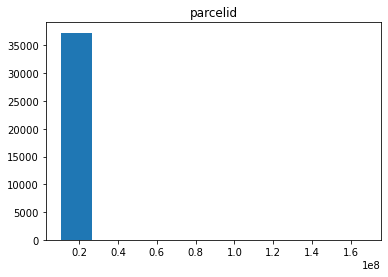

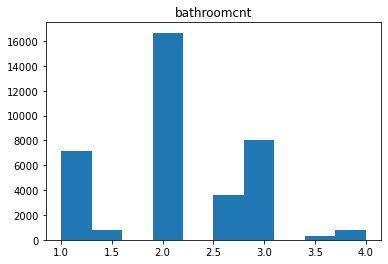

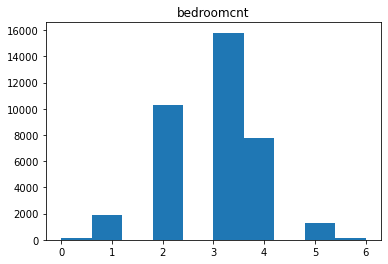

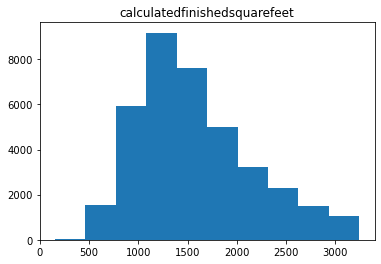

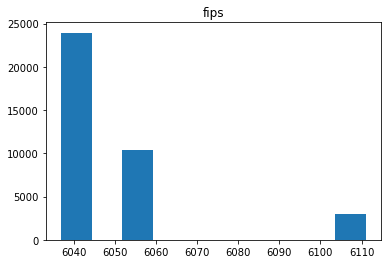

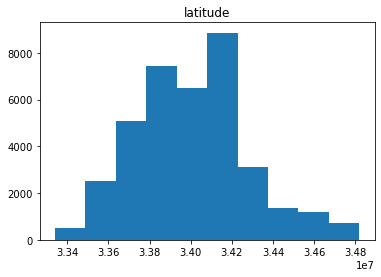

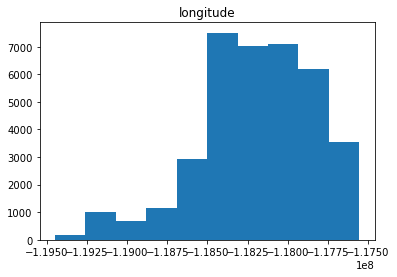

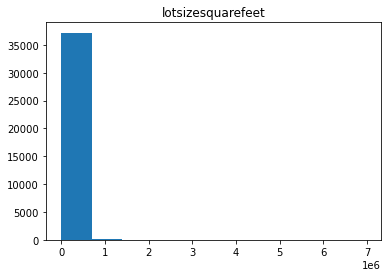

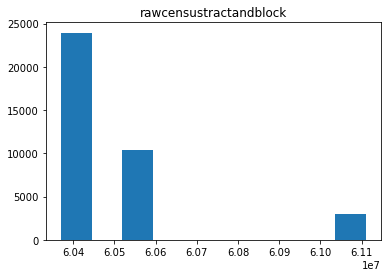

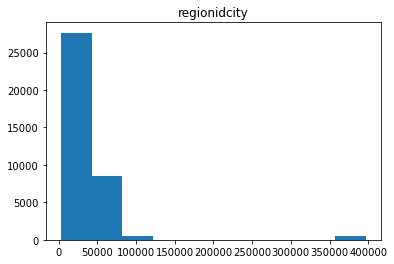

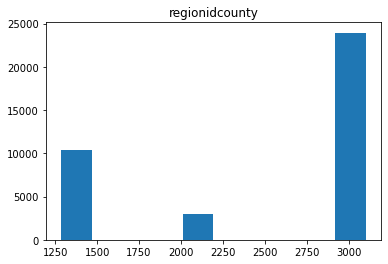

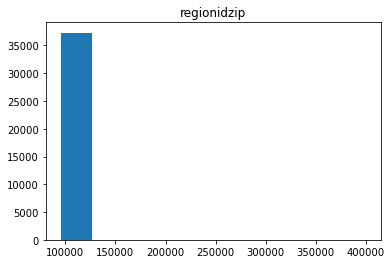

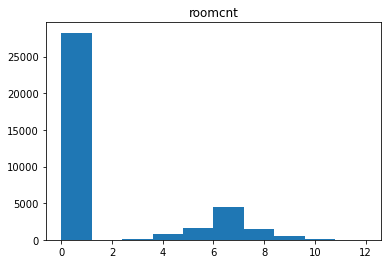

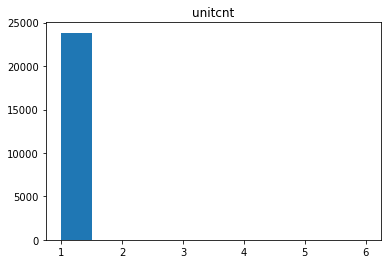

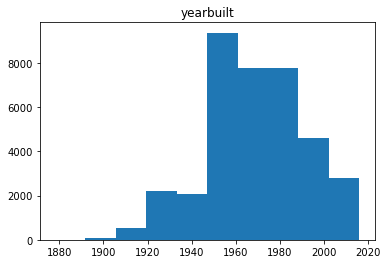

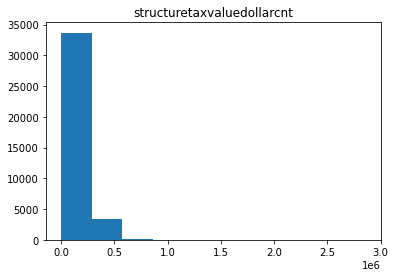

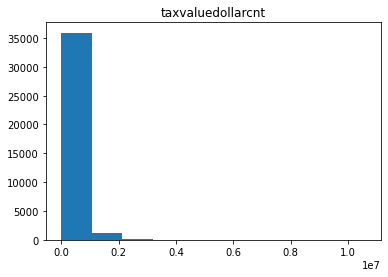

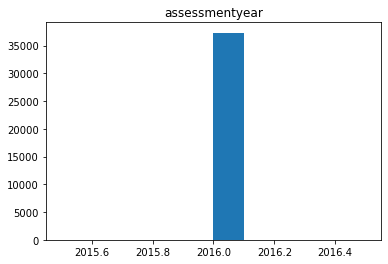

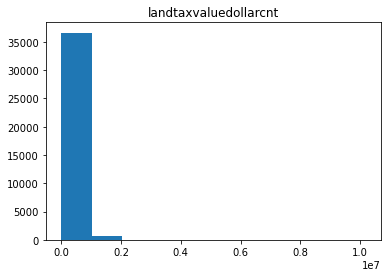

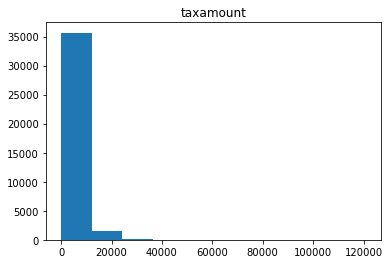

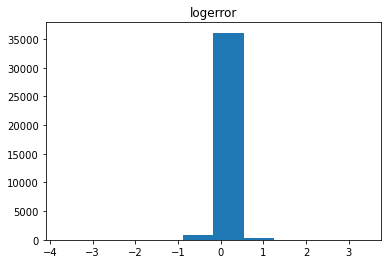

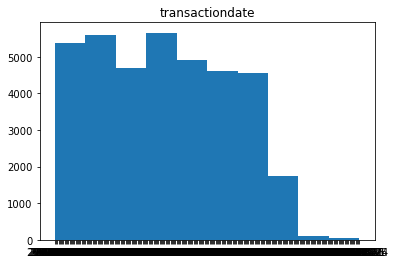

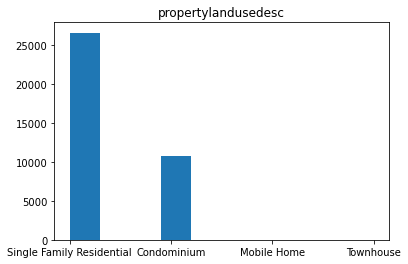

In [10]:
# Q1. What are the distributions of each variable?
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [11]:
# notes:
# not much value in many of features or charts
#

In [12]:
# Q2. Does logerror vary across fips?

# categorical variable: fips
# continuous variable: logerror
# boxplot to compare means visually
# do some statistical testing

In [13]:
df.fips.value_counts()

6037.0    42831
6059.0    18535
6111.0     5253
Name: fips, dtype: int64

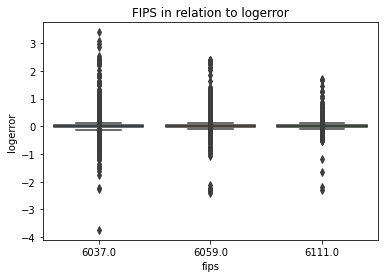

In [14]:
sns.boxplot(train.fips, train.logerror)
plt.title('FIPS in relation to logerror')
plt.show()

In [15]:
# null hypothesis: equal variance in logerror across fip code 6037 and fips code 6059
# alpha = 0.05

stats.levene(train[train.fips==6037].logerror, train[train.fips==6059].logerror)

LeveneResult(statistic=42.55721059039166, pvalue=6.959784977763874e-11)

can reject the null, variance is not equal

In [16]:
# null hypothesis: there is no significant difference in means between 6037 and 6059
# alpha = 0.05

stats.ttest_ind(train[train.fips==6037].logerror, train[train.fips==6059].logerror, equal_var=False)

Ttest_indResult(statistic=-1.022378584059201, pvalue=0.3066147725147935)

cannot reject the null, there is no significant difference in means

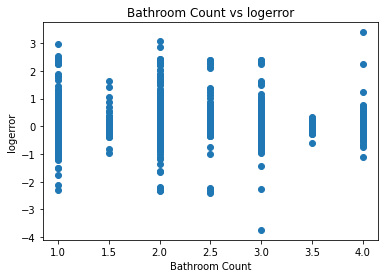

In [18]:
# Q3. Is there a relationship between logerror and bathroomcnt?

plt.scatter(train.bathroomcnt, train.logerror)
plt.xlabel('Bathroom Count')
plt.ylabel('logerror')
plt.title('Bathroom Count vs logerror')
plt.show()

In [19]:
# bin # of bathrooms
train['bathroom_bin'] = pd.cut(train.bathroomcnt,[0,2,4])

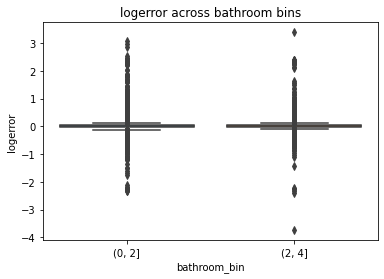

In [20]:
sns.boxplot(train.bathroom_bin, train.logerror)
plt.title('logerror across bathroom bins')
plt.show()

In [21]:
# levene H0 : equal variance across logerror between under 2 bathrooms group and over 2 bathrooms group
# alpha = 0.05

stats.levene(train[train.bathroomcnt <= 2].logerror, train[train.bathroomcnt > 2].logerror)

LeveneResult(statistic=60.02430561348093, pvalue=9.605713209182065e-15)

can reject the null, variance is not equal

In [22]:
# null hypothesis: there is no significant difference in means between under 2 bathrooms group and over 2 bathrooms group
# alpha = 0.05

stats.ttest_ind(train[train.bathroomcnt <= 2].logerror, train[train.bathroomcnt > 2].logerror, equal_var=False)

Ttest_indResult(statistic=-1.266203325216236, pvalue=0.2054512043600969)

cannot reject the null, there is no significant difference in means

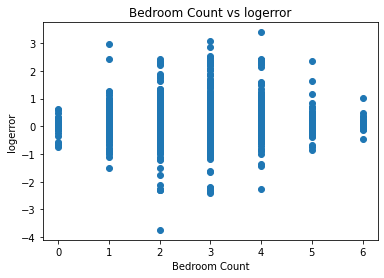

In [24]:
# Q4. Is there a relationship between logerror and bedroomcnt?

plt.scatter(train.bedroomcnt, train.logerror)
plt.xlabel('Bedroom Count')
plt.ylabel('logerror')
plt.title('Bedroom Count vs logerror')
plt.show()

In [25]:
# bin # of bedrooms
train['bedroom_bin'] = pd.cut(train.bedroomcnt,[0,3,6])

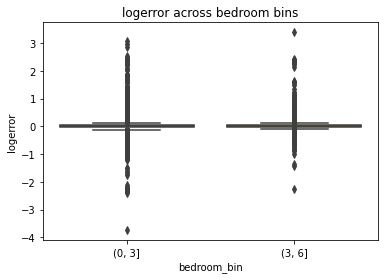

In [26]:
sns.boxplot(train.bedroom_bin, train.logerror)
plt.title('logerror across bedroom bins')
plt.show()

In [27]:
# levene H0 : equal variance across logerror between under 3 bedrooms group and over 3 bedrooms group
# alpha = 0.05

stats.levene(train[train.bedroomcnt <= 3].logerror, train[train.bedroomcnt > 3].logerror)

LeveneResult(statistic=14.02900910363133, pvalue=0.0001802826435927379)

can reject the null, variance is not equal

In [28]:
# null hypothesis: there is no significant difference in means between under 3 bedrooms group and over 3 bedrooms group
# alpha = 0.05

stats.ttest_ind(train[train.bedroomcnt <= 3].logerror, train[train.bedroomcnt > 3].logerror, equal_var=False)

Ttest_indResult(statistic=-4.7840834710622895, pvalue=1.7329528477283934e-06)

cannot reject the null, there is no significant difference in means

In [29]:
# Q5. If we control for calculatedfinishedsquarefeet, does logerror differ across taxamount?

df.calculatedfinishedsquarefeet.mean()

1573.7487203350395

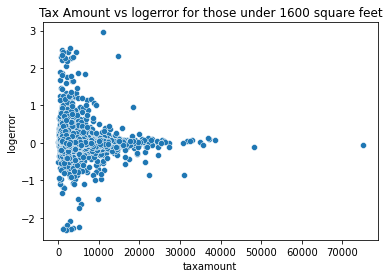

In [30]:
sns.scatterplot(x='taxamount', y='logerror', data=train[train.calculatedfinishedsquarefeet <= 1600])
plt.title('Tax Amount vs logerror for those under 1600 square feet')
plt.show()

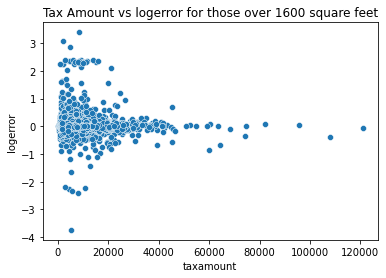

In [31]:
sns.scatterplot(x='taxamount', y='logerror', data=train[train.calculatedfinishedsquarefeet > 1600])
plt.title('Tax Amount vs logerror for those over 1600 square feet')
plt.show()

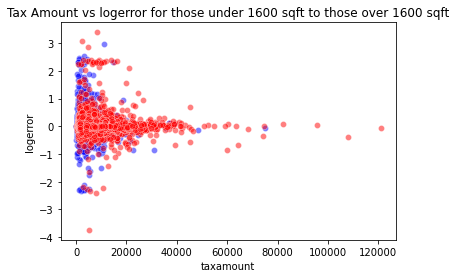

In [32]:
sns.scatterplot(x='taxamount', y='logerror', data=train[train.calculatedfinishedsquarefeet <= 1600], color='blue', alpha=0.5)
sns.scatterplot(x='taxamount', y='logerror', data=train[train.calculatedfinishedsquarefeet > 1600], color='red', alpha=0.5)
plt.title('Tax Amount vs logerror for those under 1600 sqft to those over 1600 sqft')
plt.show()

In [33]:
# is this being affected by county?

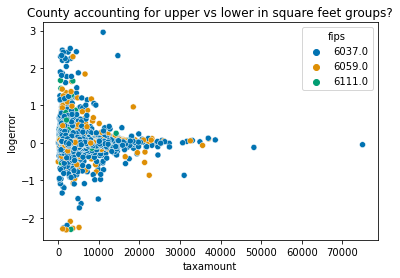

In [34]:
sns.scatterplot(x='taxamount', y='logerror', data=train[train.calculatedfinishedsquarefeet <=1600], hue='fips', palette='colorblind')
plt.title('County accounting for upper vs lower in square feet groups?')
plt.show()